In [13]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [14]:
connection = sqlite3.connect("../db.sqlite3")
query = "SELECT restaurant_orderitem.*, restaurant_product.name, restaurant_product.price, restaurant_order.datetime " \
        "FROM restaurant_orderitem INNER JOIN restaurant_product, restaurant_order " \
        "ON restaurant_orderitem.product_id = restaurant_product.id AND restaurant_orderitem.order_id = restaurant_order.id"
df = pd.read_sql(query, connection)

df.to_csv("orders.csv", index=False)

connection.close()
df

,id,quantity,order_id,product_id,name,price,datetime
0,1,2,1,6,Plain Papadum,0.80,2019-08-03 20:25:00
1,2,1,1,240,King Prawn Balti,12.95,2019-08-03 20:25:00
2,3,1,1,19,Garlic Naan,2.95,2019-08-03 20:25:00
3,4,1,1,36,Mushroom Rice,3.95,2019-08-03 20:25:00
4,5,1,1,111,Paneer Tikka Masala,8.95,2019-08-03 20:25:00
...,...,...,...,...,...,...,...
74813,74814,2,3255,247,House Red wine 75cl,17.95,2016-05-18 18:53:00
74814,74815,2,12905,247,House Red wine 75cl,17.95,2016-05-14 19:28:00
74815,74816,2,3272,247,House Red wine 75cl,17.95,2016-05-10 13:18:00
74816,74817,1,11404,248,House white wine 75cl,17.95,2016-04-07 19:04:00


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

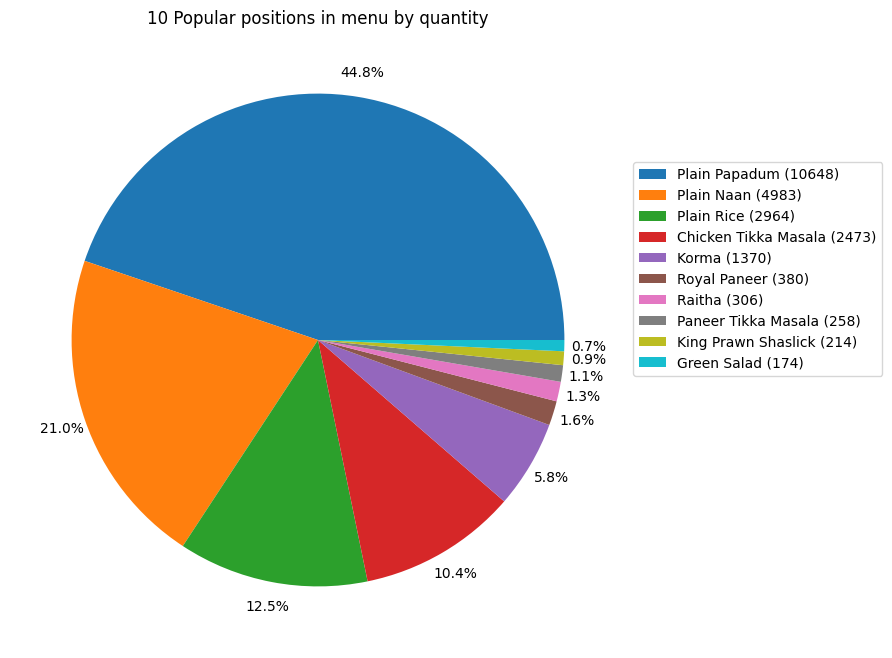

In [15]:
products_quantity = df.sort_values(by="quantity", ascending=False)
popular_products = products_quantity.drop_duplicates(subset="name").head(10)["name"] # top 10 most popular products by Quantity

filtered_df = df[df["name"].isin(popular_products)]
products_quantity = filtered_df.groupby("name")["quantity"].sum().reset_index()
products_quantity = products_quantity.sort_values(by="quantity", ascending=False) # sort descending

plt.figure(figsize=(10, 8))
plt.pie(products_quantity["quantity"], autopct="%1.1f%%", textprops=dict(color="black"), pctdistance=1.1)

legend_labels = products_quantity.apply(lambda row: f"{row['name']} ({row['quantity']})", axis=1)
plt.legend(legend_labels, loc='best', bbox_to_anchor=(1., 0.3, 0., 0.5))

plt.title("10 Popular positions in menu by quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

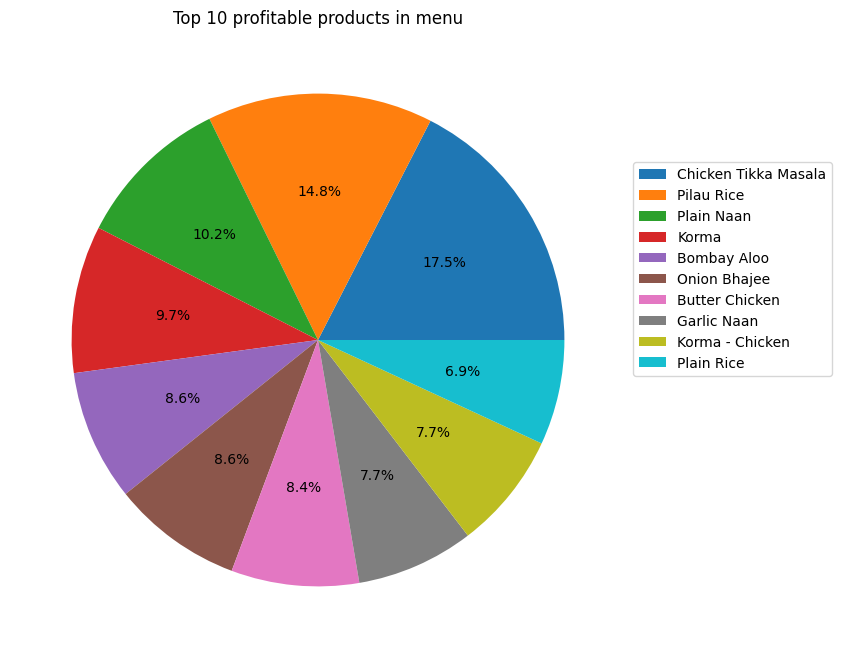

In [16]:
df["item price"] = df["price"] * df["quantity"]

products_total_prices = df.groupby("name")["item price"].sum().reset_index()
top_profitable_products = products_total_prices.sort_values(by="item price", ascending=False).head(10).rename(columns={"item price": "profit"})

plt.figure(figsize=(10, 8))
plt.pie(top_profitable_products["profit"], autopct="%1.1f%%", textprops=dict(color="black"))

plt.legend(top_profitable_products["name"], loc='best', bbox_to_anchor=(1., 0.3, 0., 0.5))
plt.title("Top 10 profitable products in menu")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

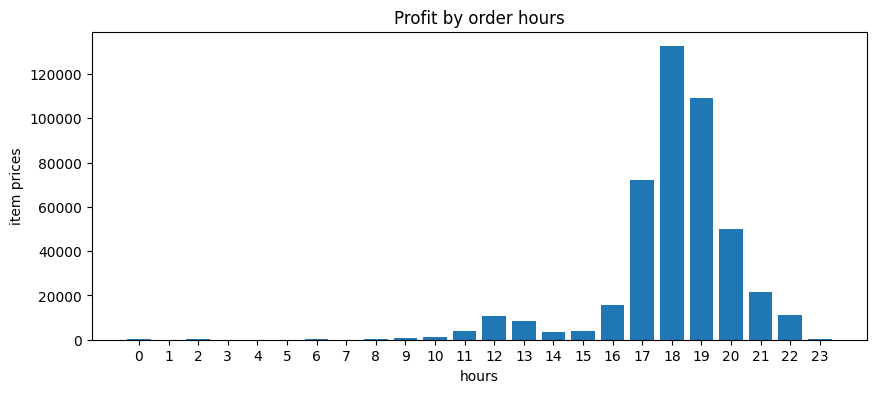

In [17]:
df["order hour"] = pd.to_datetime(df["datetime"]).dt.hour
order_by_hours = df.groupby("order hour")["item price"].sum().reset_index()

fig, ax = plt.subplots(1, figsize=(10, 4))
ax.bar(order_by_hours["order hour"], order_by_hours["item price"])
ax.set_title("Profit by order hours")
ax.set_xlabel("hours")
ax.set_ylabel("item prices")

hours = np.arange(24)
plt.xticks(hours)

plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

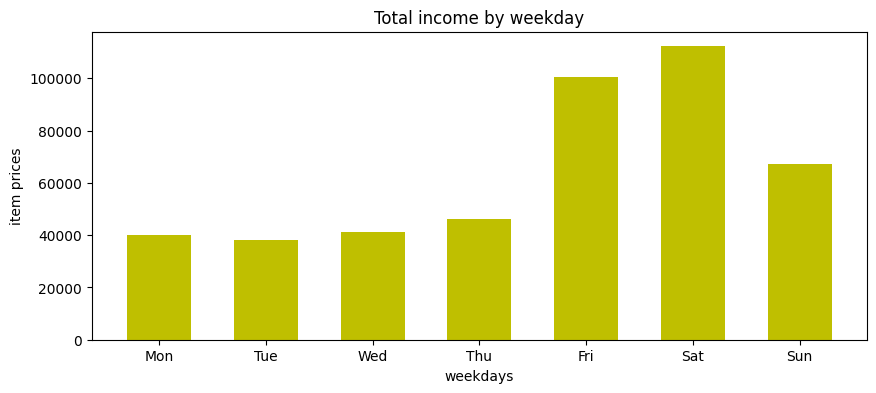

In [18]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["weekday"] = df["datetime"].dt.weekday

order_by_weekday = df.groupby("weekday")["item price"].sum().reset_index()

fig, ax = plt.subplots(1, figsize=(10, 4))
days_of_week = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
weekdays = order_by_weekday["weekday"].map(days_of_week)
income = order_by_weekday["item price"]
ax.bar(weekdays, income, color="y", width=0.6)
ax.set_title("Total income by weekday")
ax.set_xlabel("weekdays")
ax.set_ylabel("item prices")

plt.show()

In [19]:
df

,id,quantity,order_id,product_id,name,price,datetime,item price,order hour,weekday
0,1,2,1,6,Plain Papadum,0.80,2019-08-03 20:25:00,1.60,20,5
1,2,1,1,240,King Prawn Balti,12.95,2019-08-03 20:25:00,12.95,20,5
2,3,1,1,19,Garlic Naan,2.95,2019-08-03 20:25:00,2.95,20,5
3,4,1,1,36,Mushroom Rice,3.95,2019-08-03 20:25:00,3.95,20,5
4,5,1,1,111,Paneer Tikka Masala,8.95,2019-08-03 20:25:00,8.95,20,5
...,...,...,...,...,...,...,...,...,...,...
74813,74814,2,3255,247,House Red wine 75cl,17.95,2016-05-18 18:53:00,35.90,18,2
74814,74815,2,12905,247,House Red wine 75cl,17.95,2016-05-14 19:28:00,35.90,19,5
74815,74816,2,3272,247,House Red wine 75cl,17.95,2016-05-10 13:18:00,35.90,13,1
74816,74817,1,11404,248,House white wine 75cl,17.95,2016-04-07 19:04:00,17.95,19,3
